# Exercise 2
Repeat Exercise 1 for your own project and data

### Qa)
Plot the distribution Triangles. Also, find the spread, average and median.



In [5]:
import sys,os
sys.path.append(os.path.expanduser('./ProjectFunctions'))
from ProjectFunctions import LoadFunc as Func

Triangles = Func.getTriangle()
# Squares = Func.getSquare()
# Circle = Func.getCircle()
# Star = Func.getStar()

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

m1 = np.mean(Triangles)
s1 = np.std(Triangles)
v1 = np.var(Triangles)
med1 = np.median(Triangles)

print('Average of Triangles = ', m1)
print('Standard Deviation of Triangles = ', s1)
print('Variation of Triangles =', v1)
print('Median of triangles = ', med1)

Average of Triangles =  216.40278384408603
Standard Deviation of Triangles =  90.90193772051245
Variation of Triangles = 8263.162281343924
Median of triangles =  255.0


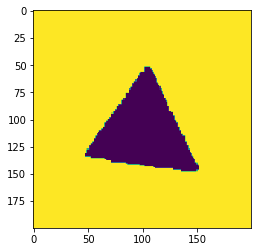

In [6]:
import pylab as pult

pult.imshow(reshape(Triangles[2]))


### Qb)
Is there a difference in median and mean in Triangles?
Which of these two describes the the Triangle the best?


Average would most likely describe Triangles the best. The median only takes the value at the "middle" and would not describe the rest of the data. The mean would describe average value of all the data, and would describe more the different values in the data set

### Qc)
Fit a normal distribution of the data and plot a histogram - does the two fit?


In [13]:
#density line
density = stats.gaussian_kde(Triangles[1])



normRead=np.random.normal(m1, s1, len(Triangles[1]))
samples, histo, _ = plt.hist(Triangles, bins='fd', density=True)
plt.plot(histo, density(histo))
plt.xlabel('Colour')
plt.ylabel('Percentage distribution')
plt.show()

LinAlgError: singular matrix

### Qd)
Is there a link between median_house_value and median_come? Make correlation plot



### Qe)
What is the 5% and 95% percentages of median_house_value? (i.e. the limits for 5% lowest and highest). Also, plot the distribution of median_house_value.
Comment on the realism of the max-value and 95% percentile - suggest a solution for this issue, if more realistic data was desired



